In [1]:
%run helper_functions.py
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
sns.set_style("whitegrid")
np.set_printoptions(suppress=True)

# Example 1-D with random data

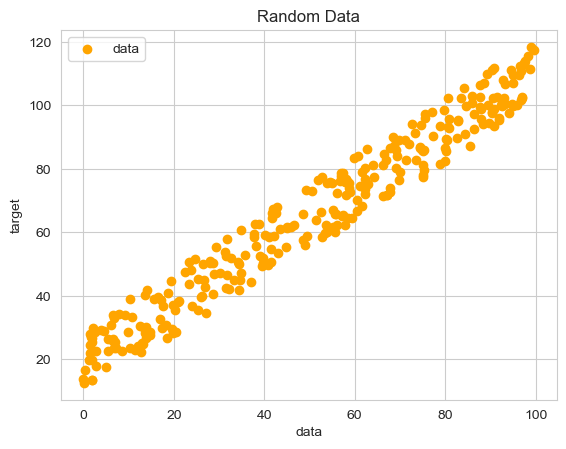

In [2]:
# create random data: generates the model basics. 
# 300 observations, intercept equals 20, the beta-coefficient equals 0.9 and the random spread is 20.

num_random_points = 300
intercept = 20
coefficient = 0.9
random_spread = 20


rng = np.random.RandomState(1)

# Definition of X: 300 random numbers from 0 to 100
X = np.sort(100 * rng.rand(num_random_points, 1), axis=0)

y = intercept + coefficient*X

#add noise
y += random_spread * (0.5 - rng.rand(num_random_points, 1))

#outliers
#y[-1] = -200
#X[-1] = 200

# Plot the random data
plt.figure()
plt.scatter(X, y, c="orange", label="data")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Random Data")
plt.legend()
plt.show()



# Linear regression
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [3]:
from sklearn.linear_model import LinearRegression


regr  = LinearRegression()
regr.fit(X, y)

# Show the model coefficients w
print ('Coefficients: \n', regr.coef_)
print ('Intercept   : \n',  regr.intercept_)

Coefficients: 
 [[0.90722997]]
Intercept   : 
 [19.69176014]


### Predicting on new data

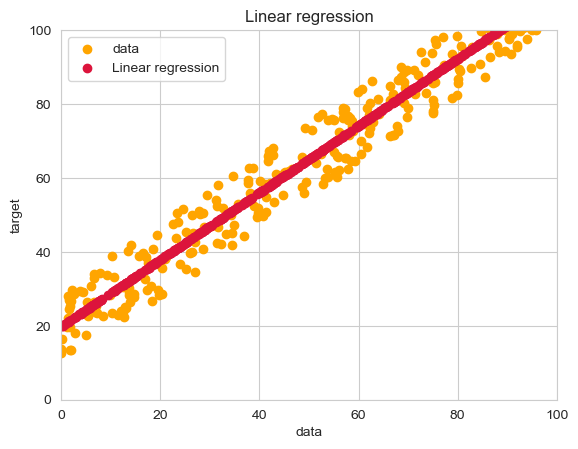

In [4]:
# Test set. We generate 500 numbers from 0-100 and predict their y values
X_test = 100 * rng.rand(500, 1)
y_test_pred = regr.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, c="orange", label="data")
plt.scatter(X_test, y_test_pred, color="crimson", label="Linear regression", linewidth=1)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Linear regression")
plt.legend()
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

### Metrics

In [5]:
from sklearn.metrics import mean_squared_error

y_pred =  regr.predict(X)

# The mean squared error (training)
print("Mean squared error on training set: %.2f" %mean_squared_error(y, y_pred))

#Explained Variance score
print('R squared score: %.2f' % regr.score(X, y))

Mean squared error on training set: 33.64
R squared score: 0.96


# Example with real data 
- Loading the boston house price dataset
- This dataset has more than one feature (multivariate regression)


In [7]:
# Load the boston dataset from sklearn
from sklearn import datasets
dataset = datasets.fetch_california_housing()

In [8]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [9]:
X = dataset.data
y = dataset.target

# these data are not shuffled...
from sklearn.utils import shuffle
X, y = sklearn.utils.shuffle(X,y)

In [10]:
pd.DataFrame(X, columns=dataset.feature_names).head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.9751,48.0,4.204762,1.009524,1655.0,3.940476,33.95,-118.25
1,5.4091,22.0,6.819182,1.058176,2347.0,3.690252,34.26,-118.74
2,2.0724,42.0,3.614004,1.019749,1920.0,3.447038,32.68,-117.10


In [11]:
from sklearn.preprocessing import Normalizer
X  = Normalizer().fit_transform(X)

In [12]:
#standardizer -> Mean = 0, Std. Dev. = 1

from sklearn.preprocessing import StandardScaler
X  = StandardScaler().fit_transform(X)

## Cross val

In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import *

regr  = LinearRegression()
y_pred = cross_val_predict(regr, X, y, cv=10)

print ("R2  (cross-val) : %.2f"% explained_variance_score(y, y_pred))
print ("MSE (cross-val) : %.2f"% mean_squared_error(y, y_pred))

R2  (cross-val) : 0.24
MSE (cross-val) : 1.01


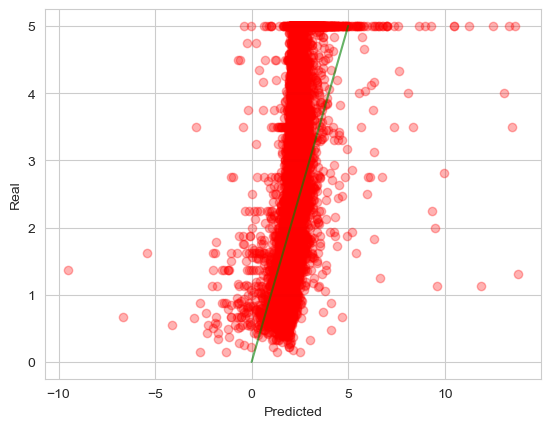

In [14]:
plt.plot(y_pred, y,'ro', alpha = 0.3)
plt.plot([0,np.max(y)], [0, np.max(y)], 'g-', alpha = 0.6)
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

In [15]:
# Show the model coefficients w
regr.fit(X, y)
print ('Coefficients: \n', regr.coef_, "\n")

Coefficients: 
 [ 0.72847801  0.19403008  0.10438668 -0.03604177  0.06939595 -0.21564596
 -2.49597916 -1.98947591] 



In [16]:
print ("\n  F(X) =  %2.3f "% regr.intercept_,  end='' )
for i in range(len(dataset.feature_names)):
    print ("%+2.2f*%s "%(regr.coef_[i], dataset.feature_names[i]) , end='')



  F(X) =  2.069 +0.73*MedInc +0.19*HouseAge +0.10*AveRooms -0.04*AveBedrms +0.07*Population -0.22*AveOccup -2.50*Latitude -1.99*Longitude 

## Ridge regression
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

It reduces the coefficients by reducing multicolinearity

In [17]:
from sklearn.linear_model import Ridge

# Alpha is actually Lambda in the slides. The higher, the smaller the weights.
# You can do a grid search for the right value of alpha.

regr  = Ridge(alpha = 0.00000000001)
y_pred = cross_val_predict(regr, X, y, cv=10)

print ("R2  (cross-val) : %.2f"% explained_variance_score(y, y_pred))
print ("MSE (cross-val) : %.2f"% mean_squared_error(y, y_pred))

# Show the model coefficients w
regr.fit(X, y)
print ('Coefficients: \n', regr.coef_, "\n")

R2  (cross-val) : 0.24
MSE (cross-val) : 1.01
Coefficients: 
 [ 0.72847801  0.19403008  0.10438668 -0.03604177  0.06939595 -0.21564596
 -2.49597916 -1.98947591] 



## Lasso regression
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

In [18]:
from sklearn.linear_model import Lasso

# Again aplha is equal to lambda in the slides.
regr  = Lasso(alpha = 0.001)
y_pred = cross_val_predict(regr, X, y, cv=10)

print ("R2  (cross-val) : %.2f"% explained_variance_score(y, y_pred))
print ("MSE (cross-val) : %.2f"% mean_squared_error(y, y_pred))

# Show the model coefficients w
regr.fit(X, y)
print ('Coefficients: \n', regr.coef_, "\n")

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.253e+01, tolerance: 2.460e+00
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.733e+01, tolerance: 2.472e+00
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.728e+01, toleranc

R2  (cross-val) : 0.24
MSE (cross-val) : 1.01
Coefficients: 
 [ 0.74063811  0.19706754  0.05943295 -0.          0.05879441 -0.2079955
 -2.00090345 -1.47379017] 



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.946e+01, tolerance: 2.476e+00
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.337e+01, tolerance: 2.748e+00
  model = cd_fast.enet_coordinate_descent(


# Logistic regression
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

We run a logistiv regression to find out which number we have.


In [19]:
from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data
y = digits.target

from sklearn.utils import shuffle
X, y = sklearn.utils.shuffle(X,y)

In [20]:
pd.DataFrame(X[0:10])

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,10.0,16.0,16.0,8.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,5.0,16.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,14.0,12.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,13.0,16.0,8.0,0.0,0.0
2,0.0,0.0,5.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,...,16.0,1.0,0.0,0.0,6.0,15.0,16.0,14.0,5.0,0.0
3,0.0,0.0,7.0,15.0,16.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,11.0,10.0,10.0,0.0,0.0
4,0.0,0.0,7.0,14.0,5.0,0.0,0.0,0.0,0.0,5.0,...,10.0,0.0,0.0,0.0,7.0,12.0,12.0,12.0,15.0,2.0
5,0.0,0.0,0.0,2.0,15.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,14.0,1.0,0.0,0.0
6,0.0,0.0,1.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,2.0,0.0
7,0.0,0.0,9.0,16.0,16.0,12.0,2.0,0.0,0.0,3.0,...,4.0,0.0,0.0,0.0,12.0,16.0,15.0,5.0,0.0,0.0
8,0.0,0.0,13.0,14.0,10.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14.0,16.0,13.0,3.0,0.0,0.0
9,0.0,0.0,3.0,13.0,8.0,0.0,0.0,0.0,0.0,4.0,...,11.0,0.0,0.0,0.0,1.0,15.0,15.0,8.0,2.0,0.0


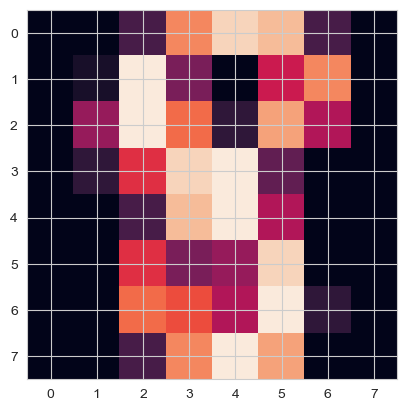

label =  8


In [21]:
image = 100
plt.imshow(X[image].reshape([8,8]))
plt.show()
print ("label = ", y[image])

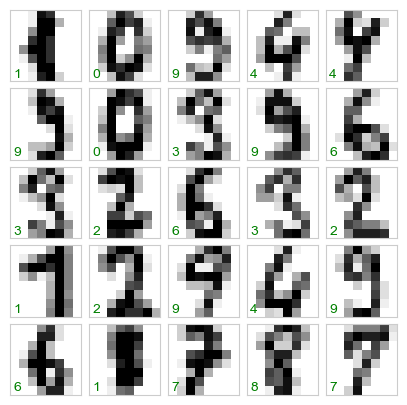

In [22]:
plot_digits_sample(X,y)

# Grid search

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Grid search
params = { 'C': [0.001, 0.01, 0.1, 1]}

model = LogisticRegression()

grid = GridSearchCV(estimator=model, cv = 10, param_grid=params )
grid.fit(X, y)
# summarize the results of the grid search
print("Best parameters: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best parameters:  LogisticRegression(C=0.01)
Best score:  0.9705090006207324


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       178
           1       0.94      0.96      0.95       182
           2       0.99      0.99      0.99       177
           3       0.98      0.97      0.98       183
           4       0.98      0.97      0.97       181
           5       0.96      0.96      0.96       182
           6       0.98      0.98      0.98       181
           7       0.99      0.99      0.99       179
           8       0.92      0.95      0.93       174
           9       0.96      0.96      0.96       180

    accuracy                           0.97      1797
   macro avg       0.97      0.97      0.97      1797
weighted avg       0.97      0.97      0.97      1797

Accuracy:  0.9705063995548135


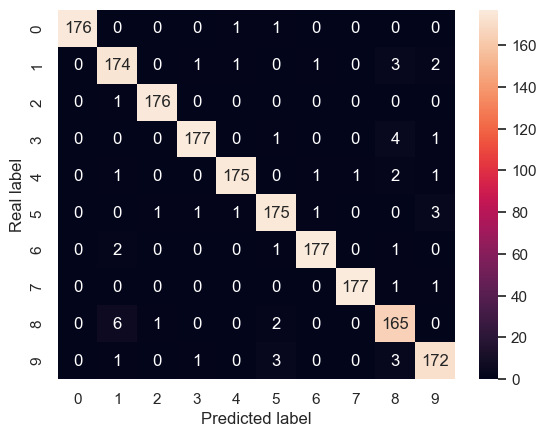

In [24]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(grid.best_estimator_, X, y, cv=10)
print (classification_report(y, y_pred))
print ("Accuracy: ", accuracy_score(y, y_pred))
cm =  confusion_matrix(y_pred=y_pred, y_true=y, labels=range(0,10))
plot_confusion_matrix(cm, range(0,10))
